In [1]:
filepath = r'D:\Research Data\CodaLab - Competition\public_data\train_data\train_task_3_4.csv'

In [2]:
!pip install pandas

In [3]:
!pip install numpy==1.19.3  
#window system problem and have to use this version to allow pandas to work 

In [5]:
import pandas as pd
pd.__version__

'1.1.4'

In [6]:
!pip install matplotlib 
!pip install seaborn

In [19]:
import matplotlib.pyplot as plt

Part 1: Checking data information and basic descriptive 

This dataset contains only about 10% of the complete data. 

In [8]:
data = pd.read_csv(filepath)

In [9]:
data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382727 entries, 0 to 1382726
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   QuestionId     1382727 non-null  int64
 1   UserId         1382727 non-null  int64
 2   AnswerId       1382727 non-null  int64
 3   IsCorrect      1382727 non-null  int64
 4   CorrectAnswer  1382727 non-null  int64
 5   AnswerValue    1382727 non-null  int64
dtypes: int64(6)
memory usage: 63.3 MB


In [11]:
#Taken a subset of the data 
data = data[['QuestionId', 'UserId', 'IsCorrect']]
data.head()

,QuestionId,UserId,IsCorrect
0,898,2111,1
1,767,3062,1
2,165,1156,1
3,490,1653,1
4,298,3912,1


In [12]:
#Number of unique questions in the dataset
data['QuestionId'].nunique()

948

In [15]:
# Number of responses per question, named as question frequency
question_freq = data['QuestionId'].value_counts()
# A series object of question ID and count of response for each 
print(question_freq)

199    2966
911    2955
89     2948
855    2945
764    2941
       ... 
832       4
294       4
757       4
15        4
603       4
Name: QuestionId, Length: 948, dtype: int64


In [17]:
#Convert the series object to a dataframe
question_freq.to_frame(name = 'counts')
question_freq.head()

199    2966
911    2955
89     2948
855    2945
764    2941
Name: QuestionId, dtype: int64

<AxesSubplot:>

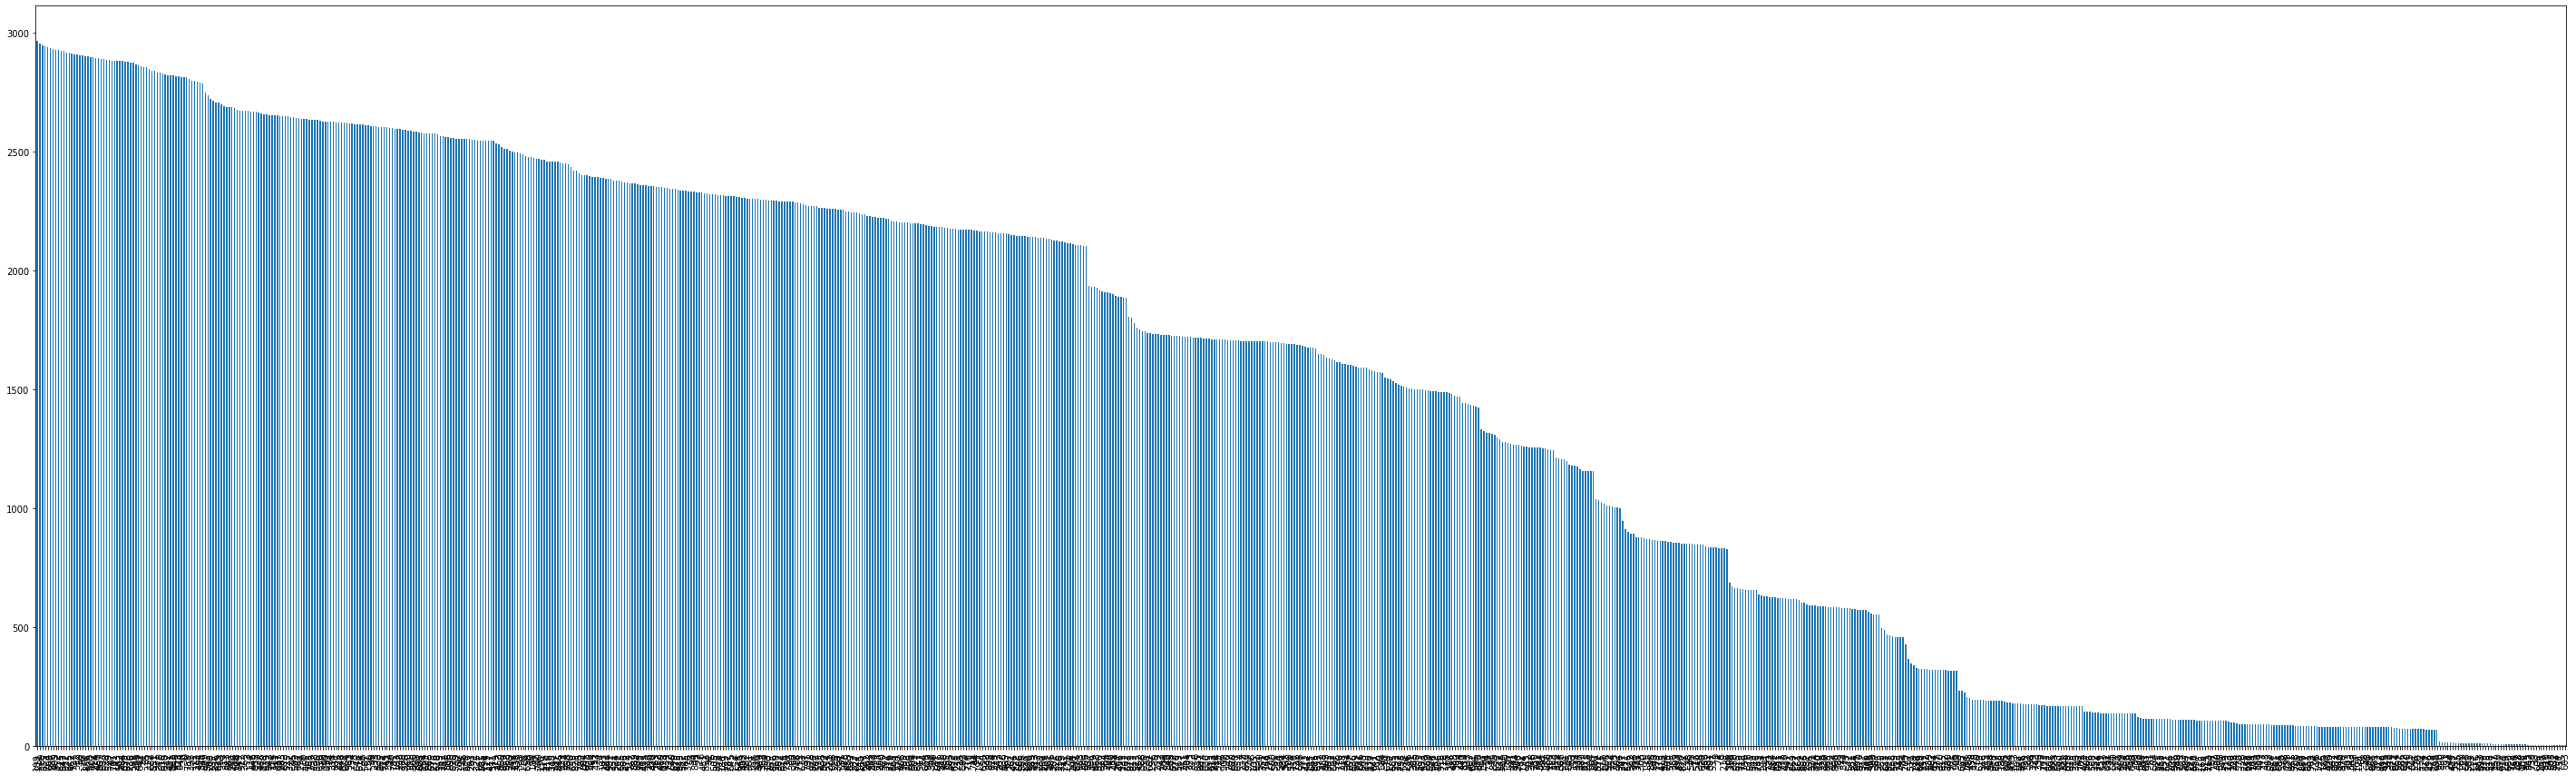

In [23]:
#Plot the distribution of question-response pair in bar graph 
plt.figure(figsize =(50, 15))
question_freq.plot.bar()

In [ ]:
#Check the question-response pair count using questionId 855
q855 = data[data.QuestionId == 855]
q855.head()

In [ ]:
#Group correct and incorrect response for QuestionId 855
q855.groupby('IsCorrect').count()

In [22]:
IsCorrect_count = data.groupby(['QuestionId', 'IsCorrect']).size().to_frame('count').reset_index()
IsCorrect_count

,QuestionId,IsCorrect,count
0,0,0,1565
1,0,1,1247
2,1,0,6
3,1,1,8
4,2,0,1422
...,...,...,...
1888,945,1,987
1889,946,0,60
1890,946,1,51
1891,947,0,237


In [28]:
#Reshape index to a nested index 
df1 = IsCorrect_count.set_index(['QuestionId', 'IsCorrect'])
df1

count
QuestionId IsCorrect       
0          0           1565
           1           1247
1          0              6
           1              8
2          0           1422
...                     ...
945        1            987
946        0             60
           1             51
947        0            237
           1            382

[1893 rows x 1 columns]

In [40]:
#Transpose the dataframe from long format to wide format 
#df2 = df1.T

In [38]:
#series format
df1.stack()

QuestionId  IsCorrect       
0           0          count    1565
            1          count    1247
1           0          count       6
            1          count       8
2           0          count    1422
                                ... 
945         1          count     987
946         0          count      60
            1          count      51
947         0          count     237
            1          count     382
Length: 1893, dtype: int64

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1893 entries, (0, 0) to (947, 1)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   1893 non-null   int64
dtypes: int64(1)
memory usage: 147.9 KB


Q1: What is the percentage of students getting the questions correctly?

Q2: For this pecentage of students, what is the estimated value on question...